In [1]:
import fastf1 as ff1
import matplotlib.pyplot as plt
import fastf1.plotting
from fastf1 import utils

fastf1.Cache.enable_cache('path/to/cache/')

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd

# FastF1's default color scheme
fastf1.plotting.setup_mpl()

# load a session and its telemetry data

year, grand_prix, session = 2023, 'Australia', 'Q'

quali = ff1.get_session(year, grand_prix, session)
quali.load()

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v2.3.0]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching 

In [12]:
driver_1, driver_2 = 'HAM', 'VER'

plot_title = f"{quali.event.year} {quali.event.EventName} - {quali.name} - {driver_1} VS {driver_2}"

laps_driver_1 = quali.laps.pick_driver(driver_1)
laps_driver_2 = quali.laps.pick_driver(driver_2)

# Select the fastest lap
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

# Retrieve the telemetry and add the distance column
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)

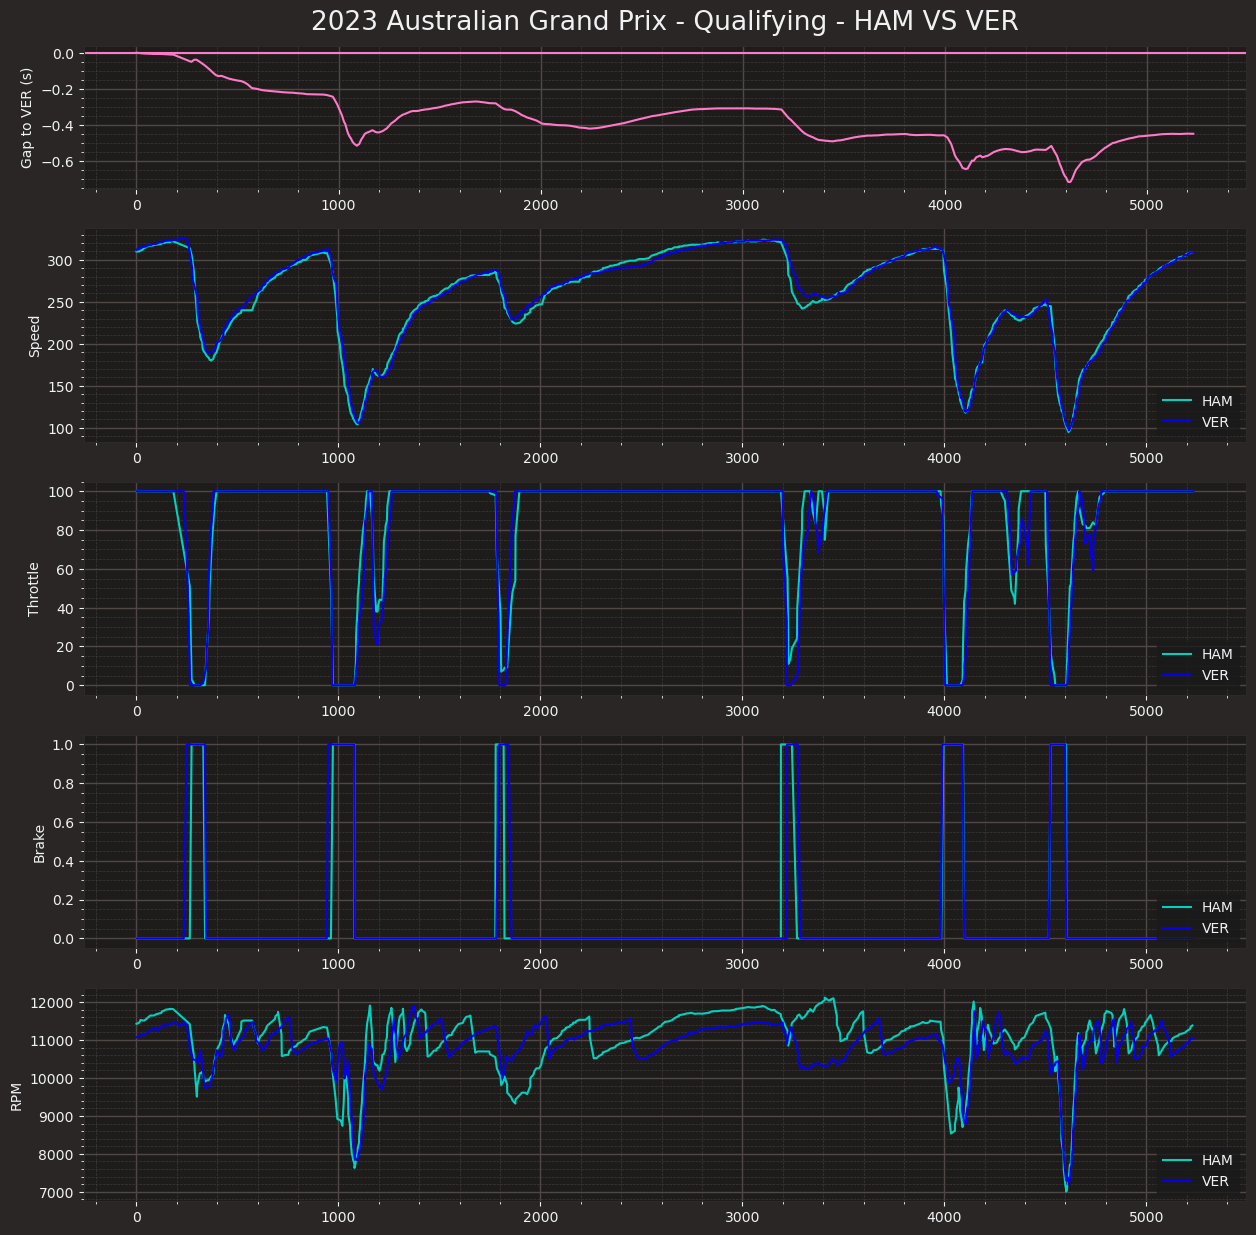

In [13]:
mer_color = fastf1.plotting.team_color('MER')
rb_color = fastf1.plotting.team_color('RBR')

plot_ratios = [2, 3, 3, 3, 3]
plot_filename = plot_title.replace(" ", "") + ".png"

plot_size = [15, 15]
plt.rcParams['figure.figsize'] = plot_size


fig, ax = plt.subplots(5, gridspec_kw={'height_ratios': plot_ratios})


ax[0].title.set_text(plot_title)

# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_2} (s)")

#Speed Trace
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], color=mer_color, label=driver_1)
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], color=rb_color, label=driver_2)
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=mer_color)
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=rb_color)
ax[2].set(ylabel='Throttle')
ax[2].legend(loc="lower right")

# Brake trace
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=mer_color)
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=rb_color)
ax[3].set(ylabel='Brake')
ax[3].legend(loc="lower right")

# RPM trace
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=mer_color)
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=rb_color)
ax[4].set(ylabel='RPM')
ax[4].legend(loc="lower right")

plt.savefig(plot_filename, dpi=600)
plt.show()